# MobileNetV2 Model with Kaggle data

source of dataset: [https://www.kaggle.com/datasets/gpiosenka/100-bird-species](https://www.kaggle.com/datasets/gpiosenka/100-bird-species)

References used within this notebook:
- [1] [https://www.tensorflow.org/tutorials/images/classification](https://www.tensorflow.org/tutorials/images/classification)
- [2] [https://www.tensorflow.org/tutorials/load_data/images](https://www.tensorflow.org/tutorials/load_data/images)
- [3] [https://keras.io/api/applications/#usage-examples-for-image-classification-models](https://keras.io/api/applications/#usage-examples-for-image-classification-models)
- [4] [https://www.kaggle.com/code/abduulrahmankhalid/birds-species-prediction-mobilenetv2-acc-95](https://www.kaggle.com/code/abduulrahmankhalid/birds-species-prediction-mobilenetv2-acc-95)
- [5] [https://keras.io/guides/transfer_learning/](https://keras.io/guides/transfer_learning/)

---

# Content
### 1) Get data insights
### 2) Train the model
### 3) Evaluation
### 4) Save model, history and parameters
### 5) Retrain model
### 6) Making some predictions

---

# 1) Get data insights

In [12]:
import os
import pathlib
import random
import numpy as np
import pandas as pd
import pickle
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras

#### Set paths to data

In [13]:
DATASET = 'kaggle'

# Get current absolute path of parent folder of this file
path_notebooks = os.path.dirname(os.path.abspath('3_MobileNetV2_Kaggle_finetuned'))

# Get path of parent directory, i.e. path to repo
path = os.path.abspath(os.path.join(path_notebooks, os.pardir))

train_dir = path + '/data/data_2/train/'
val_dir = path + '/data/data_2/valid/'

# create pathlib object from string train_dir (path to train directory)
train_dir_pl = pathlib.Path(train_dir)

In [14]:
# How many training images do we have?
image_count = len(list(train_dir_pl.glob('*/*.jp*')))
print(f'Number of training samples: {image_count}')

Number of training samples: 70626


## Load data using a Keras utility

In [15]:
# Define parameters
BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [16]:
# Import data
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      color_mode='rgb',
                                                      shuffle=True,
                                                      label_mode = 'categorical',
                                                      batch_size = BATCH_SIZE,
                                                      image_size = (IMG_HEIGHT, IMG_WIDTH),
                                                      seed=None,
                                                      validation_split=None,
                                                      crop_to_aspect_ratio=True,
                                                      interpolation='bilinear')

val_ds = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                      color_mode='rgb',
                                                      label_mode ='categorical',
                                                      batch_size = BATCH_SIZE,
                                                      image_size = (IMG_HEIGHT, IMG_WIDTH),
                                                      seed=None,
                                                      validation_split=None,
                                                      crop_to_aspect_ratio=True,
                                                      interpolation='bilinear')

Found 70626 files belonging to 450 classes.
Found 2250 files belonging to 450 classes.


In [17]:
# Get class names
class_names = train_ds.class_names
print(class_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAN

### First visual impression
- using PIL (python image library) for first two images
- using matplotlib.image for two additional images

In [18]:
# Create list of paths to all birds of class 'ABBOTTS BABBLER' and show first two birds
abbotts_babbler = list(train_dir_pl.glob('ABBOTTS BABBLER/*'))

Image shape: (224, 224)


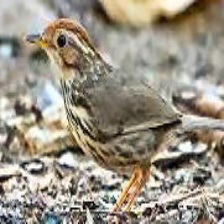

In [19]:
img1 = PIL.Image.open(str(abbotts_babbler[0]))
print(f"Image shape: {img1.size}")
img1

Image shape: (224, 224)


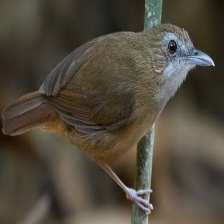

In [20]:
img2 = PIL.Image.open(str(abbotts_babbler[1]))
print(f"Image shape: {img2.size}")
img2

The following function is taken from [4]

In [21]:
def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


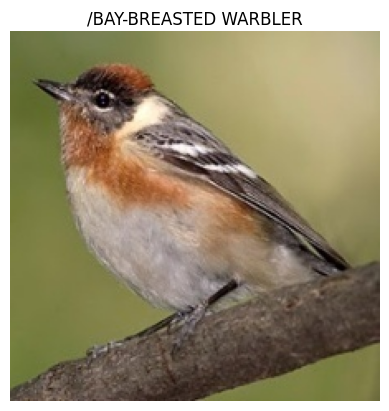

In [22]:
img3 = view_random_image(target_dir = train_dir,
                        target_class = '/BAY-BREASTED WARBLER'
                        )

Image shape: (224, 224, 3)


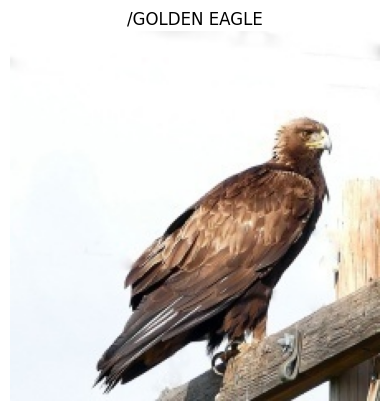

In [23]:
img4 = view_random_image(target_dir = train_dir,
                        target_class = '/GOLDEN EAGLE'
                        )

#### Additional visualizations

2022-11-04 22:55:10.936608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


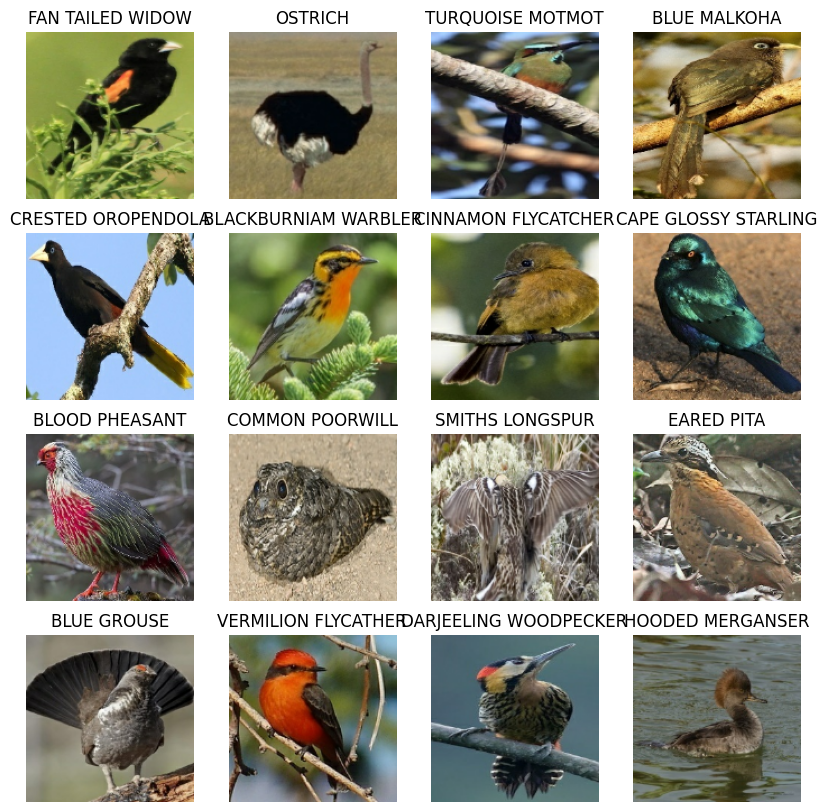

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.title(class_names[labels[i].numpy().argmax()])
    plt.axis("off")

### Configure the dataset for performance

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

---

# 2) Train the model

### Define Hyperparameters

In [34]:
NUM_EPOCHS = 40
NUM_CLASSES = len(class_names)
LEARNING_RATE = 0.005

## Set up model

In [27]:
# 0. Random data augmentation: flipping + rotation to compensate small image dataset
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"), 
    tf.keras.layers.RandomRotation(0.1), # randomly rotates counter clock-wise 10% of 360° (i.e. 36°)
])

# 1. Create a base pre-trained model with tf.keras.applications
# include_top=False: Do not include the MobileNetV2 classifier at the top.
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# 2. Freeze the base model
base_model.trainable = False

# 3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(IMG_HEIGHT, IMG_WIDTH, 3), name="input-layer")

# 4. Preprocessing: Only for training, during inference time, the output will be identical to input.
# Apply random data augmentation
x = data_augmentation(inputs)

# 5. Preprocessing according to pre-trained model: inputs pixel values are scaled between -1 and 1
# will also be applied during inference time (i.e. when used to predict)
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs) #x

# 6. Pass the inputs
x = base_model(x)
print(f"Shape after passing inputs through base model: {x.shape}")

# 7. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 8. Regularize with dropout (only while training applied)
#x = tf.keras.layers.Dropout(0.2)(x)

# 9. Create the output activation layer
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name="output-layer")(x)

# 10. Combine the inputs with outputs into a model
model = tf.keras.Model(inputs, outputs)

Shape after passing inputs through base model: (None, 5, 5, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


### Compile Model

In [35]:
model.compile(loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = ["accuracy"])

### CallBacks

In [29]:
train_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy", patience=5, restore_best_weights=True
    )
]

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 150, 150, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                  

### Train the model

In [36]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=NUM_EPOCHS,
    #steps_per_epoch = len(train_ds),
    #validation_steps = int(0.25*len(val_ds)),
    callbacks=train_callbacks
)

Epoch 1/40


2022-11-05 08:38:22.915860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - ETA: 0s - loss: 0.4628 - accuracy: 0.9658

2022-11-05 08:41:56.215704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - 222s 100ms/step - loss: 0.4628 - accuracy: 0.9658 - val_loss: 4.0542 - val_accuracy: 0.8733
Epoch 2/40
2208/2208 [==============================] - 222s 100ms/step - loss: 0.2859 - accuracy: 0.9761 - val_loss: 4.0746 - val_accuracy: 0.8733
Epoch 3/40
2208/2208 [==============================] - 223s 101ms/step - loss: 0.2419 - accuracy: 0.9787 - val_loss: 3.6302 - val_accuracy: 0.8822
Epoch 4/40
2208/2208 [==============================] - 457s 207ms/step - loss: 0.2367 - accuracy: 0.9796 - val_loss: 3.8147 - val_accuracy: 0.8813
Epoch 5/40
2208/2208 [==============================] - 592s 268ms/step - loss: 0.1941 - accuracy: 0.9824 - val_loss: 3.6636 - val_accuracy: 0.8782
Epoch 6/40
2208/2208 [==============================] - 613s 278ms/step - loss: 0.2027 - accuracy: 0.9827 - val_loss: 3.7483 - val_accuracy: 0.8787
Epoch 7/40
2208/2208 [==============================] - 220s 100ms/step - loss: 0.1717 - accuracy: 0.9845 - val_loss: 4.002

---

# 3) Evaluation

The following function is taken from [4]

In [37]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

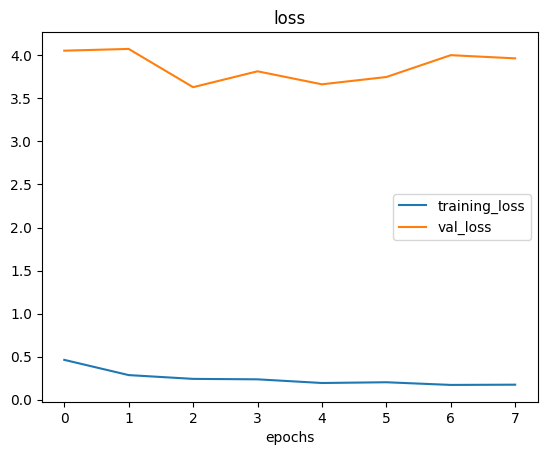

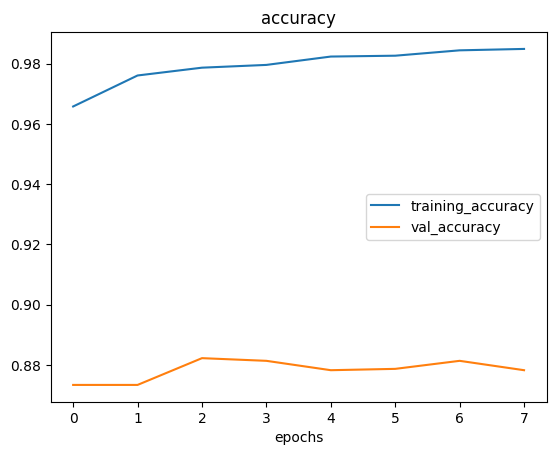

In [38]:
plot_loss_curves(history)

# 4) Save model, history and parameters

In [39]:
SAVE = False

if SAVE == True:
    # Save the entire model as a SavedModel.
    #!mkdir -p saved_model

    # make new folder 'saved_model' if it does not already exist
    if not os.path.isdir(path + '/saved_model'):
        os.makedirs(path + '/saved_model')

    model_name = 'MobileNetV2_Kaggle_p' + str(IMG_HEIGHT) + '_e ' + str(NUM_EPOCHS)
    #model.save(path + '/saved_model/' + model_name)

    # save history
    with open(path + '/saved_model/' + model_name + '/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

    # assemble model parameters
    param_dict = {}
    param_dict['ds'] = DATASET
    param_dict['lr'] = LEARNING_RATE
    param_dict['bs'] = BATCH_SIZE
    param_dict['eps'] = NUM_EPOCHS
    param_dict['img_height'] = IMG_HEIGHT

    # save model parameters
    with open(path + '/saved_model/' + model_name + '/trainParamsDict', 'wb') as file_pi:
        pickle.dump(param_dict, file_pi)


In [ ]:
# assemble model parameters
param_dict = {}
param_dict['ds'] = DATASET
param_dict['lr'] = LEARNING_RATE
param_dict['bs'] = BATCH_SIZE
param_dict['eps'] = NUM_EPOCHS
param_dict['img_height'] = IMG_HEIGHT

# save model parameters
with open(path + '/saved_model/' + model_name + '/trainParamsDict', 'wb') as file_pi:
    pickle.dump(param_dict, file_pi)

---

# 5) Retrain model

For an example, see https://keras.io/api/applications/ at the bottom **Fine-tune InceptionV3 on a new set of classes**

## Freeze top layers of Base Model

In [40]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable
base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model.compile(loss = "categorical_crossentropy",
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1*LEARNING_RATE), # when fine-tuning you typically want to lower lr by 10x
        metrics = ["accuracy"] )

In [41]:
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [42]:
# Now we have unfrozen some of the layers on the top 
print(len(model.trainable_variables))

13


## Fine-Tuning and Refitting

In [44]:
fine_tune_epochs = history.epoch[-1] + 10

# Refit the model
history_2 = model.fit(train_ds,
                       epochs = fine_tune_epochs,
                       validation_data = val_ds,
                       #validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 8/17
2208/2208 [==============================] - 486s 220ms/step - loss: 0.0645 - accuracy: 0.9846 - val_loss: 1.1973 - val_accuracy: 0.8902
Epoch 9/17
2208/2208 [==============================] - 931s 422ms/step - loss: 0.0626 - accuracy: 0.9847 - val_loss: 1.2893 - val_accuracy: 0.8809
Epoch 10/17
2208/2208 [==============================] - 387s 175ms/step - loss: 0.0562 - accuracy: 0.9854 - val_loss: 1.1991 - val_accuracy: 0.8862
Epoch 11/17
2208/2208 [==============================] - 236s 107ms/step - loss: 0.0591 - accuracy: 0.9849 - val_loss: 1.1779 - val_accuracy: 0.8964
Epoch 12/17
2208/2208 [==============================] - 238s 108ms/step - loss: 0.0508 - accuracy: 0.9871 - val_loss: 1.0743 - val_accuracy: 0.8916
Epoch 13/17
2208/2208 [==============================] - 237s 107ms/step - loss: 0.0530 - accuracy: 0.9868 - val_loss: 1.2308 - val_accuracy: 0.8867
Epoch 14/17
2208/2208 [==============================] - 242s 109ms/step - loss: 0.0552 - accuracy: 0.9862 -

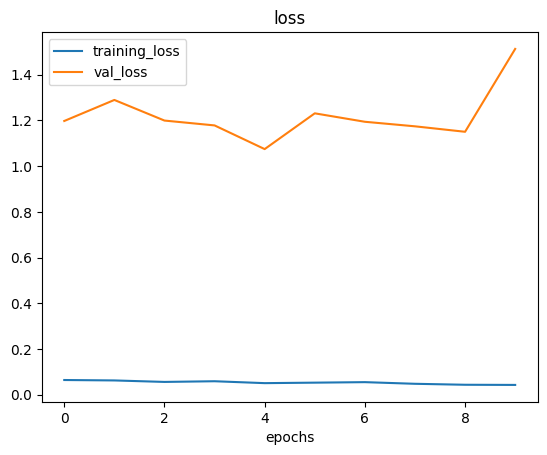

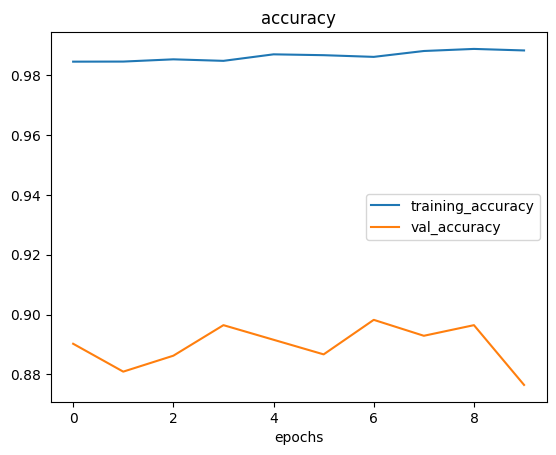

In [45]:
plot_loss_curves(history_2)

---

# 6) Making some predictions

The following function is taken from [4]

In [62]:
# Creating a function that preprocess the custom data
def load_and_prep_image(filename, img_shape = IMG_HEIGHT):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = (img/127.5)-1 # rescale the image to range [-1,1]   maybe unneccessary, as rescaling is part of the model itself? see step 4
  return img

In [63]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Get test files

In [64]:
amsel = path + '/data/data_2/images to test/Amsel.jpeg'
blaumeise = path + '/data/data_2/images to test/blaumeise.jpeg'
buchfink = path + '/data/data_2/images to test/buchfink.jpeg'
elster = path + '/data/data_2/images to test/elster.jpeg'
feldsperling = path + '/data/data_2/images to test/feldsperling.jpeg'
firefinch = path + '/data/data_2/images to test/firefinch.jpg'
gruenfink = path + '/data/data_2/images to test/grünfink.jpeg'
haussperling = path + '/data/data_2/images to test/haussperling.jpeg'
kohlmeise = path + '/data/data_2/images to test/Kohlmeise.jpeg'
mauersegler = path + '/data/data_2/images to test/mauersegler.jpeg'
mehlschwalbe = path + '/data/data_2/images to test/mehlschwalbe.jpeg'
rotkehlchen = path + '/data/data_2/images to test/Rotkehlchen.jpeg'
star = path + '/data/data_2/images to test/Star.jpeg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


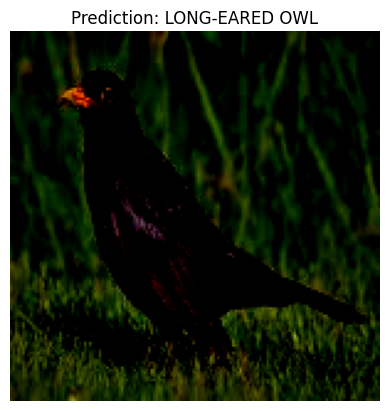

In [65]:
# amsel
pred_and_plot(model,amsel, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


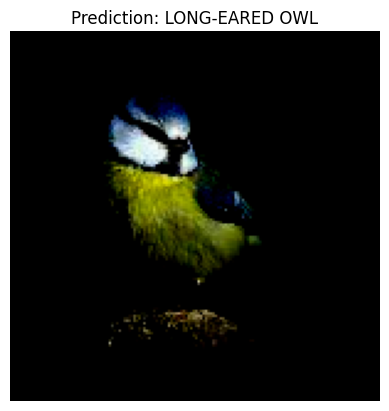

In [66]:
#blaumeise
pred_and_plot(model,blaumeise, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


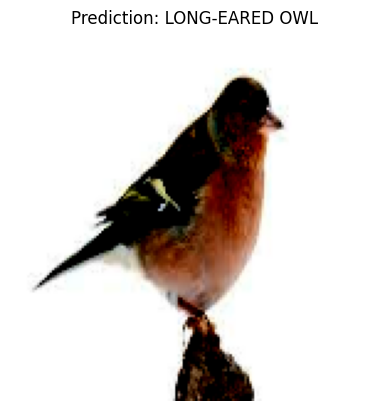

In [67]:
#buchfink
pred_and_plot(model,buchfink, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


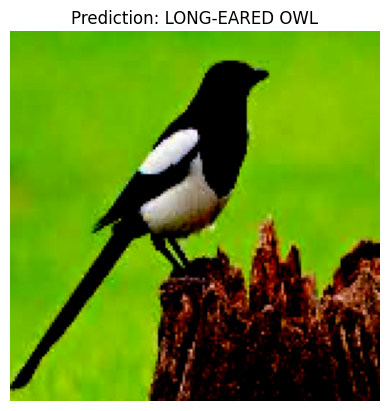

In [68]:
#elster
pred_and_plot(model,elster, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


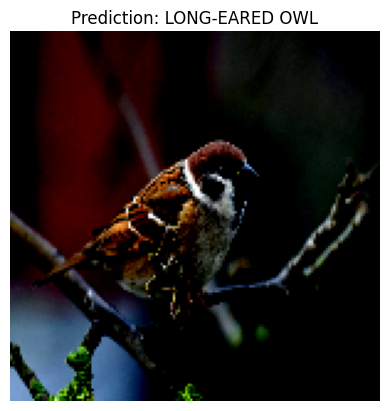

In [69]:
#feldsperling
pred_and_plot(model,feldsperling, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


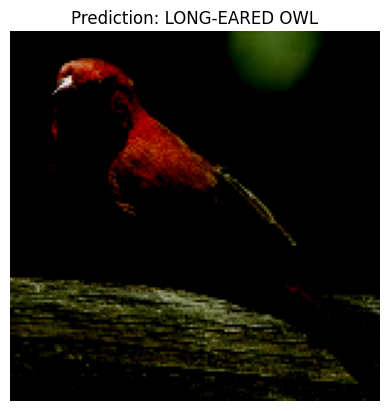

In [70]:
#firefinch
pred_and_plot(model,firefinch, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


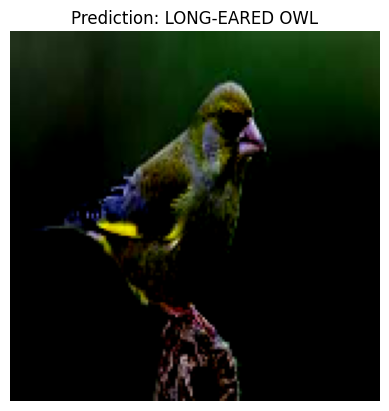

In [71]:
#gruenfink
pred_and_plot(model,gruenfink, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


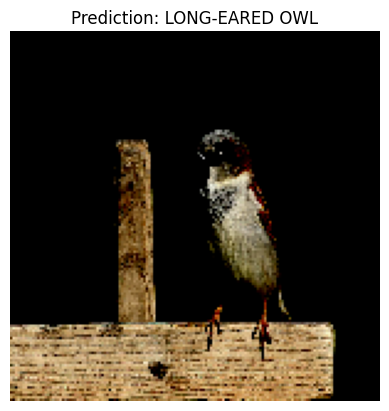

In [72]:
#haussperling
pred_and_plot(model,haussperling, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


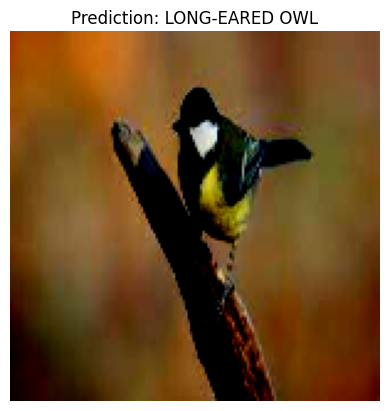

In [73]:
#kohlmeise
pred_and_plot(model,kohlmeise, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


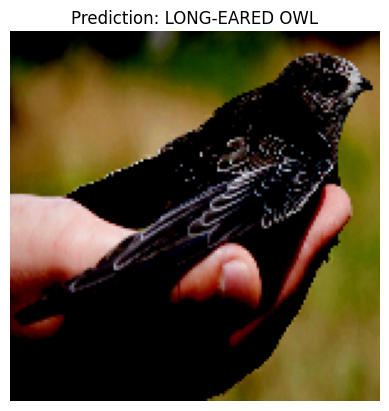

In [74]:
#mauersegler
pred_and_plot(model,mauersegler, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


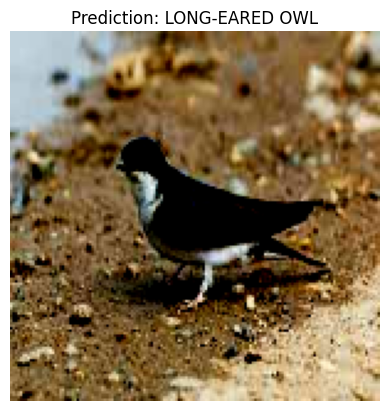

In [75]:
#mehlschwalbe
pred_and_plot(model,mehlschwalbe, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


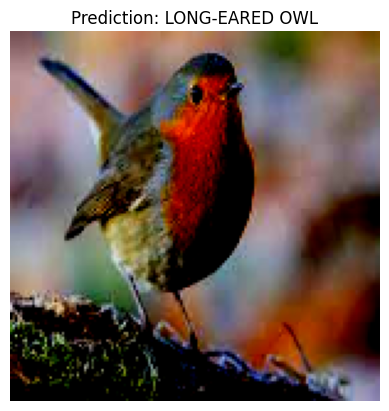

In [76]:
# rotkehlchen
pred_and_plot(model,rotkehlchen, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


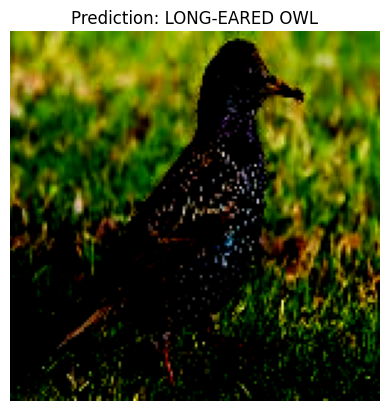

In [77]:
# star
pred_and_plot(model,star, class_names)